# Reaction-Diffusion

[![Google Collab Book](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/tum-pbs/PhiFlow/blob/develop/examples/grids/Reaction_Diffusion.ipynb)

This example runs a reaction-diffusion equation on a 2D grid.

In [1]:
%pip install --quiet phiflow
from phi.torch.flow import *
# from phi.flow import *  # If JAX is not installed. You can use phi.torch or phi.tf as well.
from tqdm.notebook import trange

In [2]:
@jit_compile
def reaction_diffusion(u, v, du, dv, f, k, dt):
    uvv = u * v**2
    su = du * field.laplace(u) - uvv + f * (1 - u)
    sv = dv * field.laplace(v) + uvv - (f + k) * v
    return u + dt * su, v + dt * sv

<Figure size 864x360 with 6 Axes>

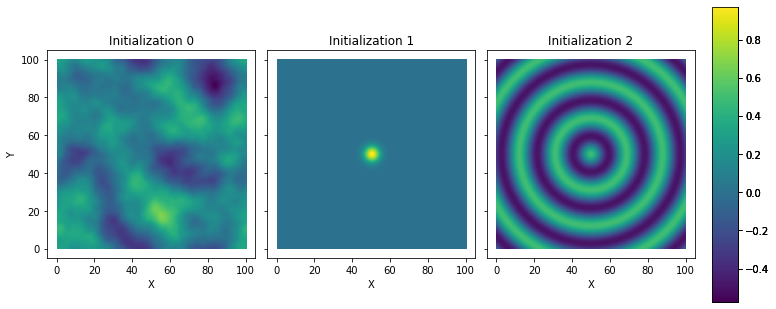

In [3]:
u0 = [
    CenteredGrid(Noise(scale=20, smoothness=1.3), x=100, y=100) * .2 + .1,
    CenteredGrid(lambda x: math.exp(-0.5 * math.sum((x - 50)**2) / 3**2), x=100, y=100),
    CenteredGrid(lambda x: math.cos(math.vec_length(x-50)/3), x=100, y=100) * .5,
]
u0 = stack(u0, batch('initialization'))
plot(u0)

### Maze

In [4]:
maze = {'du': 0.19, 'dv': 0.05, 'f': 0.06, 'k': 0.062}
u_trj, v_trj = iterate(reaction_diffusion, batch(time=100), u0, u0, dt=.5, f_kwargs=maze, substeps=20, range=trange)
plot(u_trj, animate='time')

  0%|          | 0/100 [00:00<?, ?it/s]

c:\phd\phiflow2\phiml\phiml\backend\torch\_torch_backend.py:611: TracerWarning: Converting a tensor to a Python integer might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  return tuple([int(s) for s in tensor.shape])
c:\phd\phiflow2\phiml\phiml\backend\torch\_torch_backend.py:312: TracerWarning: Converting a tensor to a Python float might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  constant_values = self.dtype(value).kind(constant_values)


### Coral

In [6]:
coral = {'du': 0.16, 'dv': 0.08, 'f': 0.06, 'k': 0.062}
u_trj, v_trj = iterate(reaction_diffusion, batch(time=200), u0, u0, dt=.5, f_kwargs=coral, substeps=20, range=trange)
plot(u_trj.time[::2], animate='time')

  0%|          | 0/200 [00:00<?, ?it/s]

### Dots

In [7]:
dots = {'du': 0.19, 'dv': 0.03, 'f': 0.04, 'k': 0.061}
u_trj, v_trj = iterate(reaction_diffusion, batch(time=100), u0, u0, dt=.5, f_kwargs=dots, substeps=20, range=trange)
plot(u_trj, animate='time')

  0%|          | 0/100 [00:00<?, ?it/s]